# Zadanie 1 - aktywność słońca

Plik spots.txt zawiera wartości aktywności Słońca w kolejnych miesiącach. Wykreśl ten sygnał oraz jego spektrum. Za pomocą FFT, oblicz częstotliwość cyklu aktywności słonecznej. Przydatne mogą być następujące konstrukcje:

array = genfromtxt('spots.txt')  (lub array=[float(x) for x in open('spots.txt').read().split()])

x = max(array)

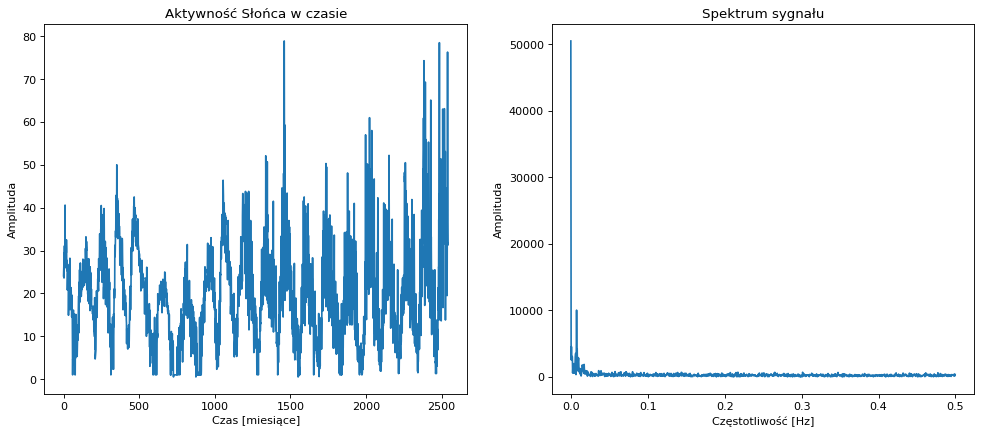

Częstotliwość cyklu: 0.00708 1/miesiąc
Okres cyklu: 11.769 lat


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('spots.txt')

fig = plt.figure(figsize=(15, 6), dpi=80)

# Wykreślenie sygnału
ax1 = fig.add_subplot(121)
ax1.plot(range(len(data)), data)
ax1.set_title('Aktywność Słońca w czasie')
ax1.set_xlabel('Czas [miesiące]')
ax1.set_ylabel('Amplituda')

# Wykreślenie spektrum sygnału
ax2 = fig.add_subplot(122)
fft_data  = np.fft.fft(data)
frequencies = np.fft.fftfreq(len(data))
positive_freqs = frequencies[:len(data)//2]
positive_fft = np.abs(fft_data[:len(data)//2])

ax2.plot(positive_freqs, positive_fft)
ax2.set_title('Spektrum sygnału')
ax2.set_xlabel('Częstotliwość [Hz]')
ax2.set_ylabel('Amplituda')

plt.show()

max_index = np.argmax(positive_fft[1:])  # Pomijamy zerową częstotliwość
freq = positive_freqs[max_index]
cycle_period_years = 1 / freq / 12

print(f"Częstotliwość cyklu: {freq:.5f} 1/miesiąc")
print(f"Okres cyklu: {cycle_period_years:.3f} lat")



# Zadanie 2 - proste filtrowanie

Wykreśl sygnał $sin(2*pi*t) + sin(4*pi*t)$, T=1s, w=20Hz. Za pomocą FFT, przekształć sygnał do dziedziny częstotliwości. Następnie usuń składowe o częstotliwości 2Hz. Tak zmodyfikowany sygnał przekształć do dziedziny czasu i wykreśl go.

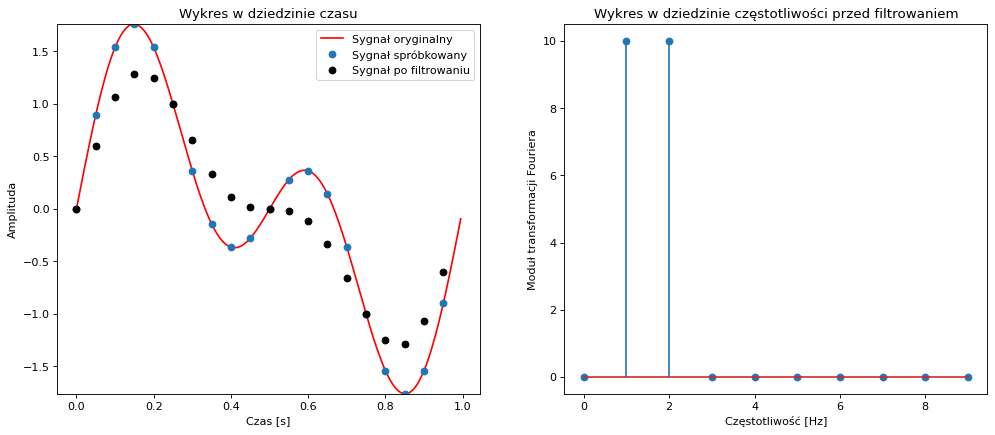

In [8]:
import numpy as np
import matplotlib.pyplot as plt

w = 20  # częstotliwość próbkowania
LP = 1  # liczba przebiegów
T = 1  # długość jednego sygnału
TW = 1 / w  # okres próbkowania

t = np.arange(0, LP * T, TW)  # momenty pobrania próbek
n = len(t)

FUNC = lambda t: np.sin(2 * np.pi * t) + np.sin(4 * np.pi * t)
signal = FUNC(t)  # funkcja spróbkowana

# Pomocniczy syngał
base_t = np.arange(0, LP * T, 1 / 200)
base_signal = FUNC(base_t)

# Tranformata Fouriera
signal1 = np.fft.fft(signal)

# Skala częstotliwości
freqs = np.fft.fftfreq(n, TW)

# Pobranie tylko dodanich częstotlwości
positive_freqs = freqs[:n // 2]
positive_signal1 = np.abs(signal1[:n // 2])

# Filtowanie sygnału
filtered_signal1 = np.copy(signal1)
filtered_signal1[2] = 0  # usunięcie składowej 2 Hz

# Odwrotna transformata Fouriera
filtered_signal = np.fft.ifft(filtered_signal1).real

# Wykres sygnału w dziedzinie czasu
fig = plt.figure(figsize=(15, 6), dpi=80)
ax = fig.add_subplot(121)
ax.plot(base_t, base_signal, linestyle='-', color='red', label='Sygnał oryginalny')
ax.plot(t, signal, 'o',label='Sygnał spróbkowany')
ax.plot(t, filtered_signal, 'o', color='black', label='Sygnał po filtrowaniu')
ax.set_ylim([min(base_signal), max(base_signal)])
ax.set_xlabel('Czas [s]')
ax.set_ylabel('Amplituda')
ax.set_title("Wykres w dziedzinie czasu")
ax.legend()

# Wykres sygnału w dziedzinie częstotliwości
ax = fig.add_subplot(122)
ax.stem(positive_freqs, positive_signal1, '-*')
ax.set_xlabel('Częstotliwość [Hz]')
ax.set_ylabel('Moduł transformacji Fouriera')
ax.set_title("Wykres w dziedzinie częstotliwości przed filtrowaniem")

plt.show()

# Zadanie 3 - informacja o fazie

Wykreśl sygnał $sin(2*pi*t) + sin(4*pi*t)$, T=1s, w=20Hz. Tym razem oprócz spektrum, wykreśl wykres z informacją o fazie poszczególnych częstotliwości (faza = arg(z)), gdzie z=a+bi. To samo wykonaj dla $sin(2*pi*t) + cos(4*pi*t)$. Porównaj otrzymane wykresy. Przydatna może być funkcja angle (z parametrem deg=True)

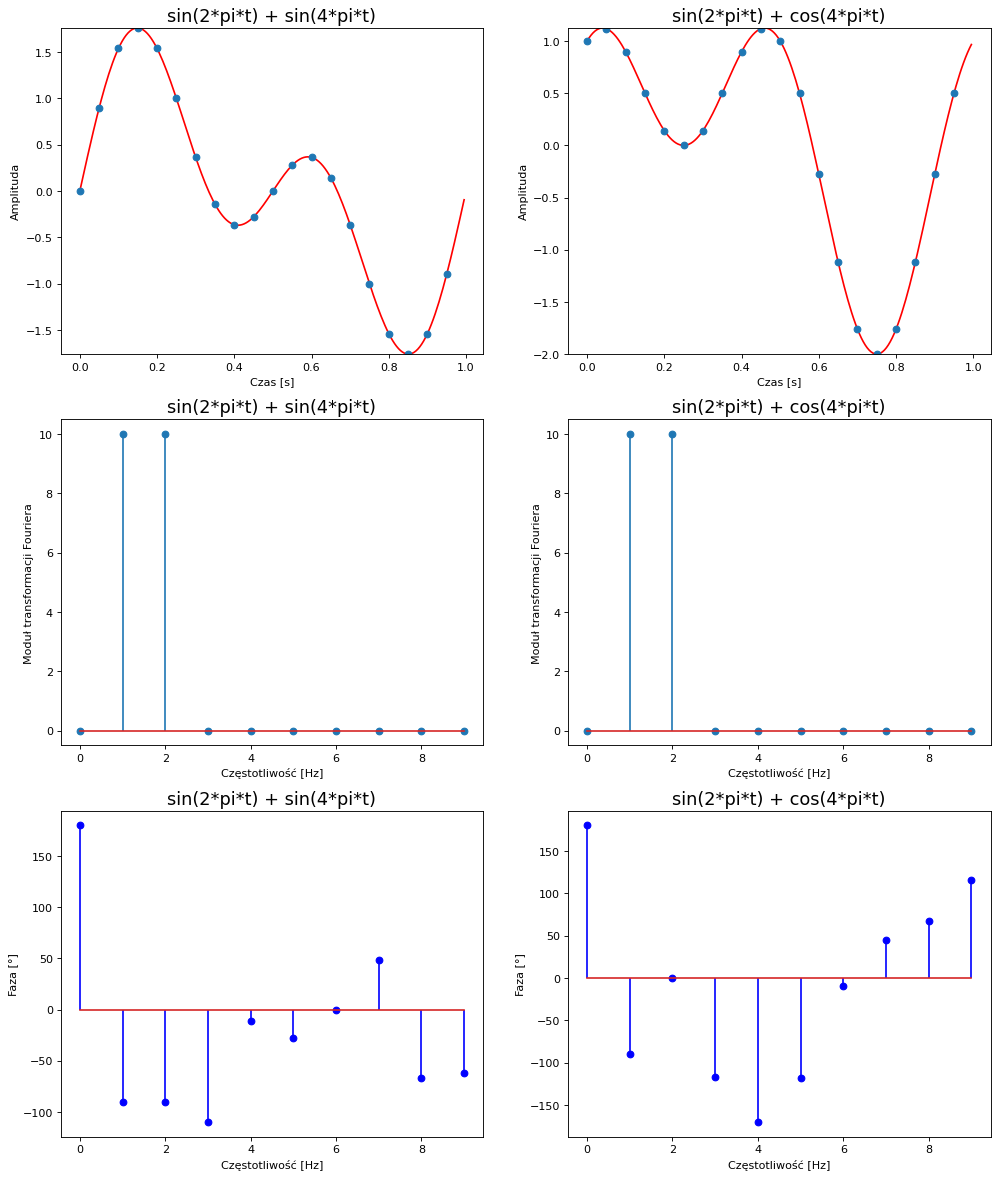

In [23]:
import numpy as np
import matplotlib.pyplot as plt

w = 20  # częstotliwość próbkowania
LP = 1  # liczba przebiegów
T = 1  # długość jednego sygnału
TW = 1 / w  # okres próbkowania

t = np.arange(0, LP * T, TW)  # momenty pobrania próbek
n = len(t)

FUNC1 = lambda t: np.sin(2 * np.pi * t) + np.sin(4 * np.pi * t)
FUNC2 = lambda t: np.sin(2 * np.pi * t) + np.cos(4 * np.pi * t)
signal1 = FUNC1(t)
signal2 = FUNC2(t)

# Pomocnicze syngały
base_t = np.arange(0, LP * T, 1 / 200)
base_signal1 = FUNC1(base_t)
base_signal2 = FUNC2(base_t)

# Transformata Fouriera
fft_signal1 = np.fft.fft(signal1)
fft_signal2 = np.fft.fft(signal2)

# Skala częstotliwości
freqs = np.fft.fftfreq(n, TW)
positive_freqs = freqs[:n // 2]  # tylko dodatnie częstotliwości

# Wyciągnięcie modułu i fazy
magnitude1 = np.abs(fft_signal1[:n // 2])
phase1 = np.angle(fft_signal1[:n // 2], deg=True)  # faza w stopniach

magnitude2 = np.abs(fft_signal2[:n // 2])
phase2 = np.angle(fft_signal2[:n // 2], deg=True)  # faza w stopniach

fig, axes = plt.subplots(3, 2, figsize=(15, 18), dpi=80)

# Wykresy sygnału w dziedzinie czasu
axes[0, 0].plot(base_t, base_signal1, linestyle='-', color='red')
axes[0, 0].plot(t, signal1, 'o')
axes[0, 0].set_ylim([min(base_signal1), max(base_signal1)])
axes[0, 0].set_xlabel('Czas [s]')
axes[0, 0].set_ylabel('Amplituda')
axes[0, 0].set_title('sin(2*pi*t) + sin(4*pi*t)', fontsize=16)

axes[0, 1].plot(base_t, base_signal2, linestyle='-', color='red')
axes[0, 1].plot(t, signal2, 'o')
axes[0, 1].set_ylim([min(base_signal2), max(base_signal2)])
axes[0, 1].set_xlabel('Czas [s]')
axes[0, 1].set_ylabel('Amplituda')
axes[0, 1].set_title('sin(2*pi*t) + cos(4*pi*t)', fontsize=16)

# Wykresy sygnału w dziedzinie częstotliwości
axes[1, 0].stem(positive_freqs, magnitude1, '-*')
axes[1, 0].set_xlabel('Częstotliwość [Hz]')
axes[1, 0].set_ylabel('Moduł transformacji Fouriera')
axes[1, 0].set_title('sin(2*pi*t) + sin(4*pi*t)', fontsize=16)

axes[1, 1].stem(positive_freqs, magnitude2, '-*')
axes[1, 1].set_xlabel('Częstotliwość [Hz]')
axes[1, 1].set_ylabel('Moduł transformacji Fouriera')
axes[1, 1].set_title('sin(2*pi*t) + cos(4*pi*t)', fontsize=16)

# Wykresy fazy
axes[2, 0].stem(positive_freqs, phase1, '-*', linefmt='b', markerfmt='bo')
axes[2, 0].set_xlabel('Częstotliwość [Hz]')
axes[2, 0].set_ylabel('Faza [°]')
axes[2, 0].set_title('sin(2*pi*t) + sin(4*pi*t)', fontsize=16)

axes[2, 1].stem(positive_freqs, phase2, '-*', linefmt='b', markerfmt='bo')
axes[2, 1].set_xlabel('Częstotliwość [Hz]')
axes[2, 1].set_ylabel('Faza [°]')
axes[2, 1].set_title('sin(2*pi*t) + cos(4*pi*t)', fontsize=16)

plt.show()


Wykresy spektrum dla obu funkcji są takie same, a wykresy faz różnią się od siebie znacząco.

# Zadanie 4 - plik wejściowy audio

Wczytaj plik err.wav. Wykreśl jego spektrum. Spróbuj także skali logarytmicznej. Określ dominujące w sygnale częstotliwości. Przydatne:

import scipy.io.wavfile

w, signal = scipy.io.wavfile.read('err.wav')

signal = [s[0] for s in signal]   #Tylko pierwszy kanał

yscale('log')

spectrum[::10]        # co 10-ty element


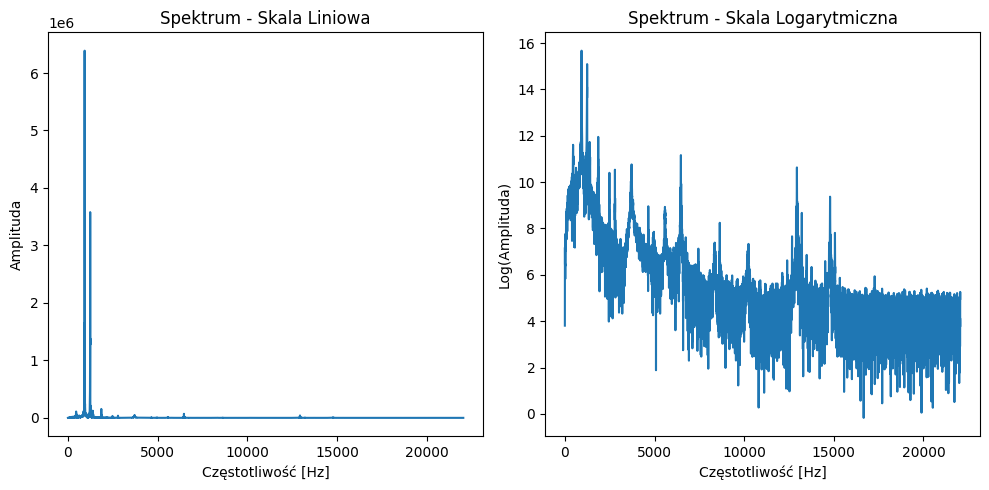

Dominujące częstotliwości (Hz): [ 931.77705224  930.74860075  929.72014925 1242.36940299 1243.39785448
  932.80550373 1241.34095149  928.69169776 1244.42630597  934.86240672]


In [1]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

w, signal = wav.read('err.wav')

signal = [s[0] for s in signal]  # Tylko pierwszy kanał

signal1 = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal1), 1/w)  # Skala częstotliwości

# Pobranie tylko dodanich częstotlwości
positive_freqs = frequencies[:len(frequencies) // 2]
positive_signal1 = np.abs(signal1[:len(frequencies) // 2])

# Wykres spektrum
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(positive_freqs, positive_signal1) 
plt.title('Spektrum - Skala Liniowa')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')

# Wykres sprektrum w skali logarytmicznej
plt.subplot(1, 2, 2)
plt.plot(positive_freqs, np.log(positive_signal1))
plt.title('Spektrum - Skala Logarytmiczna')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Log(Amplituda)')

plt.tight_layout()
plt.show()

dominant_frequencies = frequencies[np.argsort(positive_signal1)[::-1][:10]]
print("Dominujące częstotliwości (Hz):", dominant_frequencies)
